In [146]:
import matplotlib.pyplot as plt
import numpy as np
import math as math
import matplotlib.pyplot as plt
%matplotlib notebook

In [218]:
#Constants  
c       = 299792458.0                           #Speed of light
f       = 144e6                                 #Frequency of interest
lamb    = c/f                                   #Wavelength of transmission
d       = 384.4e6                               #Distance to the moon in m
r       = 1.737e6                               #Radius of the moon in m
eta     = 0.7                                   #Moon's reflection coefficient
p_t     = 500                                   #Power transmitted in Watts
eff_a   = 93                                    #Effective collecting area per dish
ant_num = 47                                    #Number of antennas
A       = eff_a                                 #Total collecting area
ch_w    = 97656.25                              #Channel Width
t_150   = 248                                   #Brightness Temp @ 150
sp_idx  = 2.6                                   #Spectral Index
k       = 1.38064852e-23                        #Boltzmann's Constant

In [219]:
g_r  = (4.0*np.pi*eff_a)/(lamb**2)              #Gain of receiving antenna
g_t  = 10.0**(2.1)                              #Gain of transmitting antenna
loss = (eta*(r*lamb)**2)/(64*np.pi**2*d**4)     #Path loss
p_r  = p_t*g_t*g_r*loss                         #Power received
jy   = (p_r*1.0e26)/(eff_a*ch_w)                #Flux density of EME

In [220]:
omega  = 6.0e-5                                 #Moon solid angle
t_sky  = t_150*(f/150e6)**(-sp_idx)             #Sky brightness temperature
S      = (2*k*t_sky*omega)/((lamb**2)*1.0e-26)  #Flux density of sky
t_moon = 230                                    #Moon brightness temperature 
S_moon = (2*k*t_moon*omega)/((lamb**2)*1.0e-26) #Moon flux density

In [221]:
print 'Power Transmitted:',p_t,'W\n','Power Received:',p_r,'W (',jy,'JY ) \n\nTransmitting Antenna Gain:', g_t,'\nReceiving Antenna Gain:',g_r,'\nPath Loss:',loss
print "\nSky Brightness Temperature @ 144MHz:", t_sky, "K\nSky Flux Density @ 144MHz:",S,"JY\nMoon Flux Density @ 144 MHz:", S_moon, "JY"

Power Transmitted: 500 W
Power Received: 1.12654166443e-17 W ( 124.040716599 JY ) 

Transmitting Antenna Gain: 125.892541179 
Receiving Antenna Gain: 269.635078071 
Path Loss: 6.63744389677e-25

Sky Brightness Temperature @ 144MHz: 275.769654446 K
Sky Flux Density @ 144MHz: 10.5413062547 JY
Moon Flux Density @ 144 MHz: 8.79175935238 JY


In [216]:
f_2     = np.linspace(100,200,101)
f_2     = f_2*1.0e6
lamb_2  = c/f_2 
t_sky   = t_150*(f_2/150e6)**(-sp_idx)       #Sky brightness temperature
S2      = (2*k*t_sky*omega)/((lamb_2**2)*1.0e-26)         #Flux density of sky
t_moon  = 230                                  #Moon brightness temperature
                               #Moon solid angle
S_moon2 = (2*k*t_moon*omega)/((lamb_2**2)*1.0e-26)        #Moon flux density

<IPython.core.display.Javascript object>


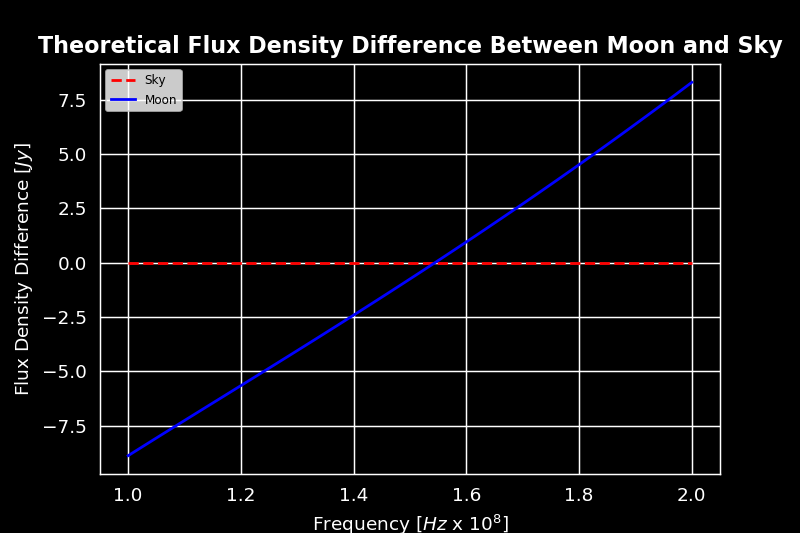

Text(0.5,1,'Theoretical Flux Density Difference Between Moon and Sky')

In [217]:
fig1 = plt.figure(figsize=(6.0,4.0), facecolor="black", edgecolor="white")
axes = plt.subplot(111)
axes.patch.set_facecolor("black")
plt.grid(True, color="white")
plt.yticks(color="white")
plt.xticks(color="white")
for spine in axes.spines.values():
    spine.set_color("white")

plt.plot(f_2,S2-S2,"r--", label="Sky")
plt.plot(f_2,S_moon2-S2, "b-", label="Moon")

plt.legend(loc="upper left", fontsize=6.5)

plt.xlabel("Frequency [$Hz$ x 10$^8$]", color="white")
plt.ylabel("Flux Density Difference [$Jy$]", color="white")
plt.title("Theoretical Flux Density Difference Between Moon and Sky", fontweight="bold", color="white")

In [224]:
eme_diff  = (jy+S_moon) - S
moon_diff = S_moon - S 
print eme_diff, moon_diff

122.291169697 -1.74954690232
